# CNN - MedHacks

Import libraries

In [708]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

import pickle
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

import scikitplot as skplt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,array_to_img

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

from dict import dict
from PIL import Image

## Data Augmentation

In [47]:
image_dimension = 224
batch_size = 32

# Creating training, validation, and test image flows
train_gen = ImageDataGenerator(rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               rotation_range=0.3,
                               horizontal_flip = True)



test_gen = ImageDataGenerator(rescale = 1/255)


##############################################################################

train_set = train_gen.flow_from_directory('train-test-val_datasets/train',
                                          target_size = (image_dimension,image_dimension), 
                                          batch_size = batch_size,
                                          class_mode = 'categorical')


val_gen = test_gen.flow_from_directory('train-test-val_datasets/val',
                                      target_size = (image_dimension,image_dimension),
                                      batch_size = batch_size,
                                      class_mode = 'categorical')



test_set = test_gen.flow_from_directory('train-test-val_datasets/test',
                                        target_size = (image_dimension,image_dimension),
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle=False)

Found 468 images belonging to 3 classes.
Found 57 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [48]:
train_set.class_indices

{'COVID-19_Xray': 0, 'Normal_Xray': 1, 'PNEUMONIA_Xray': 2}

## CNN - Multi Class

In [62]:
from tensorflow.keras.applications import ResNet50V2

In [65]:
from tensorflow.keras.applications import ResNet50V2

model = ResNet50V2(weights='imagenet',
                   include_top=False,
                   input_shape=(224,224,3))
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [66]:
# Freeze all the layers in the base model
for layer in model.layers:
    layer.trainable = False

In [69]:
from tensorflow.keras.models import Model

# Add our own layers to the end of the network
x = model.output 
x = Flatten()(x) 
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=model.input, 
              outputs=output)

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Use an early stopping callback to stop training
# once we no longer have improvements in our validation loss
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=2, 
                           mode='min', 
                           verbose=1)

model2 = model.fit(train_set,
          epochs=50,
          validation_data = val_gen,
          callbacks=[early_stop])

Epoch 1/50
15/15 [==============================] - 17s 911ms/step - loss: 0.7816 - accuracy: 0.7436 - val_loss: 0.6907 - val_accuracy: 0.7544
Epoch 2/50
15/15 [==============================] - 12s 790ms/step - loss: 0.5787 - accuracy: 0.8291 - val_loss: 0.5714 - val_accuracy: 0.7895
Epoch 3/50
15/15 [==============================] - 12s 823ms/step - loss: 0.4815 - accuracy: 0.8248 - val_loss: 0.3788 - val_accuracy: 0.9123
Epoch 4/50
15/15 [==============================] - 12s 812ms/step - loss: 0.3962 - accuracy: 0.8953 - val_loss: 0.4287 - val_accuracy: 0.8772
Epoch 5/50
15/15 [==============================] - 12s 809ms/step - loss: 0.6092 - accuracy: 0.7714 - val_loss: 0.3297 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 12s 805ms/step - loss: 0.5769 - accuracy: 0.8162 - val_loss: 0.6231 - val_accuracy: 0.8596
Epoch 7/50
15/15 [==============================] - 12s 808ms/step - loss: 0.5248 - accuracy: 0.8654 - val_loss: 0.3794 - val_accuracy: 0.9298

In [72]:
model.save('CNN_model_2.h5')

In [734]:
CNN_model2 = Sequential()

CNN_model2.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

CNN_model2.add(Conv2D(64,(3,3),activation="relu"))
CNN_model2.add(MaxPooling2D(pool_size = (2,2)))
CNN_model2.add(Dropout(0.25))

CNN_model2.add(Conv2D(64,(3,3),activation="relu"))
CNN_model2.add(MaxPooling2D(pool_size=(2,2)))
CNN_model2.add(Dropout(0.25))

CNN_model2.add(Conv2D(128,(3,3),activation="relu"))
CNN_model2.add(MaxPooling2D(pool_size=(2,2)))
CNN_model2.add(Dropout(0.25))

CNN_model2.add(Conv2D(256,(3,3),activation="relu"))
CNN_model2.add(MaxPooling2D(pool_size=(2,2)))
CNN_model2.add(Dropout(0.25))


CNN_model2.add(Flatten())
CNN_model2.add(Dense(64,activation="relu"))
CNN_model2.add(Dropout(0.5))

CNN_model2.add(Dense(3,activation="softmax"))

CNN_model2.compile(loss=keras.losses.categorical_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [735]:
CNN_model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 54, 54, 64)      

In [736]:
epochs = 50
batch_size = 32
num_of_train_samples = 468
num_of_val_samples = 57

In [737]:
model2 = CNN_model2.fit_generator(
    train_set,
    steps_per_epoch = num_of_train_samples / batch_size,
    epochs = epochs,
    validation_data = val_gen,
    validation_steps = num_of_val_samples / batch_size
)

Epoch 1/50
14/14 [==============================] - 14s 902ms/step - loss: 1.2692 - accuracy: 0.3162 - val_loss: 1.0957 - val_accuracy: 0.3333
Epoch 2/50
14/14 [==============================] - 13s 892ms/step - loss: 1.0932 - accuracy: 0.3718 - val_loss: 1.0876 - val_accuracy: 0.5263
Epoch 3/50
14/14 [==============================] - 13s 856ms/step - loss: 0.9977 - accuracy: 0.5064 - val_loss: 1.0284 - val_accuracy: 0.6140
Epoch 4/50
14/14 [==============================] - 13s 865ms/step - loss: 0.8986 - accuracy: 0.5769 - val_loss: 0.7230 - val_accuracy: 0.7895
Epoch 5/50
14/14 [==============================] - 13s 853ms/step - loss: 0.7715 - accuracy: 0.5962 - val_loss: 0.6490 - val_accuracy: 0.6667
Epoch 6/50
14/14 [==============================] - 14s 946ms/step - loss: 0.7549 - accuracy: 0.5983 - val_loss: 0.6166 - val_accuracy: 0.8246
Epoch 7/50
14/14 [==============================] - 13s 905ms/step - loss: 0.6946 - accuracy: 0.6474 - val_loss: 0.5100 - val_accuracy: 0.8421

In [84]:
CNN_model2.save('CNN_model_3.h5')

In [729]:
model.evaluate_generator(train_set)

[0.43270859122276306, 0.9081196784973145]

90.8% accurate

In [738]:
from keras.models import load_model
model_final  = tf.keras.models.load_model('CNN_model_3.h5')

In [739]:
model_final.evaluate_generator(train_set)

[0.2016097605228424, 0.9316239356994629]

- 0.93 Accuracy
- 0.20 Loss

In [740]:
model_final.evaluate_generator(test_set)

[0.21082769334316254, 0.920634925365448]

- 0.92 Accuracy
- 0.21 Loss

In [742]:
score = model.evaluate(test_set, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 1s 396ms/step - loss: 0.5120 - accuracy: 0.8889
Test loss: 0.5119886994361877
Test accuracy: 0.8888888955116272


In [743]:
score2 = model_final.evaluate(test_set, verbose=1)

print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

2/2 [==============================] - 1s 388ms/step - loss: 0.2108 - accuracy: 0.9206
Test loss: 0.21082769334316254
Test accuracy: 0.920634925365448


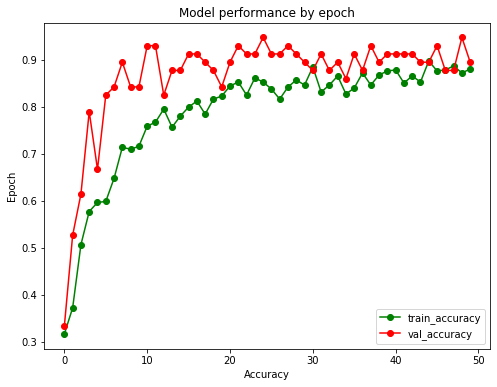

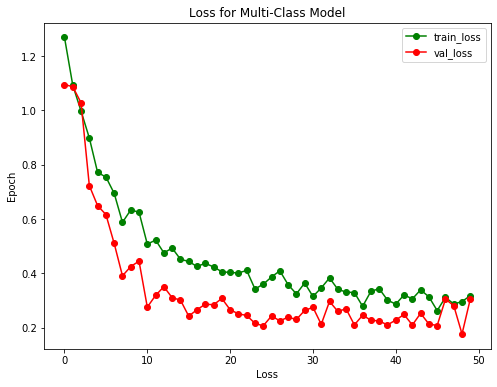

In [745]:
plt.figure(figsize=(8,6))
plt.title('Model performance by epoch')
plt.plot(model2.history['accuracy'],'go-')
plt.plot(model2.history['val_accuracy'],'ro-')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss for Multi-Class Model')
plt.plot(model2.history['loss'],'go-')
plt.plot(model2.history['val_loss'],'ro-')
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.show()

In [589]:
test_set.classes #### y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [746]:
predictions = model_final.predict(test_set)
trueClass=test_set.classes[test_set.index_array]

In [747]:
# Converting the probabilities to binaries
predictedClass = np.argmax(predictions, axis=1)

In [748]:
# Names of the classes.
target_names = list(train_set.class_indices.keys())
target_names

['COVID-19_Xray', 'Normal_Xray', 'PNEUMONIA_Xray']

In [749]:
conf_mat=confusion_matrix(y_true=trueClass, y_pred=predictedClass)

In [750]:
normalized_conf_mat = conf_mat / conf_mat.sum(axis=1)

In [751]:
conf_mat

array([[21,  0,  0],
       [ 0, 21,  0],
       [ 1,  4, 16]], dtype=int64)

In [752]:
normalized_conf_mat

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.04761905, 0.19047619, 0.76190476]])

In [753]:
train_set.class_indices

{'COVID-19_Xray': 0, 'Normal_Xray': 1, 'PNEUMONIA_Xray': 2}

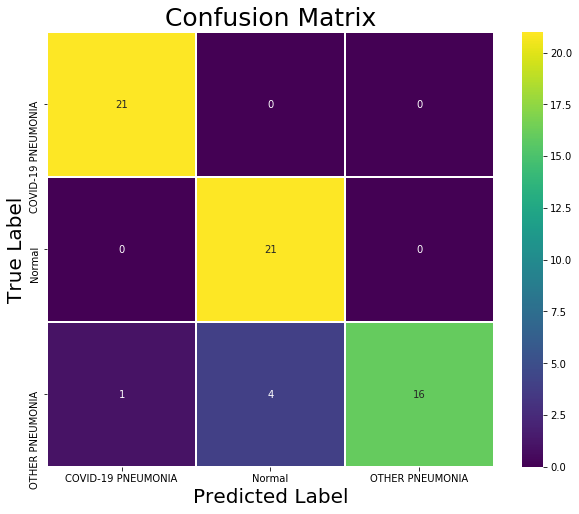

In [754]:
plt.figure(figsize = (10,8))
x_axis_labels = ['COVID-19 PNEUMONIA','Normal','OTHER PNEUMONIA']
y_axis_labels = ['COVID-19 PNEUMONIA','Normal','OTHER PNEUMONIA']
sns.heatmap(conf_mat,
            annot=True,
            cbar=True,
            cmap="viridis",
            linewidths=0.5,
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

In [755]:
print(classification_report(trueClass, predictedClass, target_names=target_names))

                precision    recall  f1-score   support

 COVID-19_Xray       0.95      1.00      0.98        21
   Normal_Xray       0.84      1.00      0.91        21
PNEUMONIA_Xray       1.00      0.76      0.86        21

      accuracy                           0.92        63
     macro avg       0.93      0.92      0.92        63
  weighted avg       0.93      0.92      0.92        63



<Figure size 432x288 with 0 Axes>

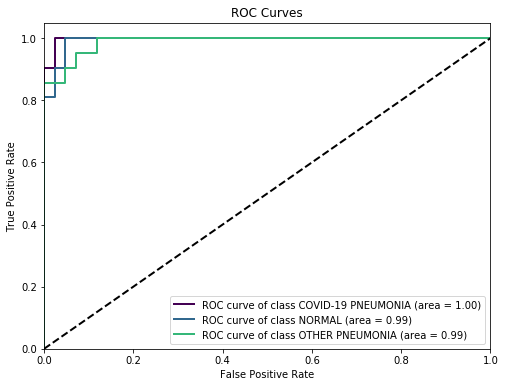

In [727]:
# Generatring the ROC curve using the Scikitplot's plot_roc method
plt.figure()
skplt.metrics.plot_roc(y_true=trueClass,
                       y_probas=predictions,
                       title='ROC Curves',
                       plot_micro=False,
                       plot_macro=False,
                       classes_to_plot=None,
                       ax=None,
                       figsize=(8, 6),
                       cmap='viridis')
plt.show()

In [601]:
dict = {0: 'COVID-19 PNEUMONIA', 
        1: 'NORMAL', 
        2: 'OTHER PNEUMONIA'}

In [602]:
predictedClass = np.vectorize(dict.get)(predictedClass)

In [603]:
trueClass = np.vectorize(dict.get)(trueClass)

### Incorrect Predictions (from test_set)

In [604]:
incorrect = np.where(predictedClass != trueClass)[0]
print("Found %d incorrect labels" % len(incorrect))

Found 5 incorrect labels


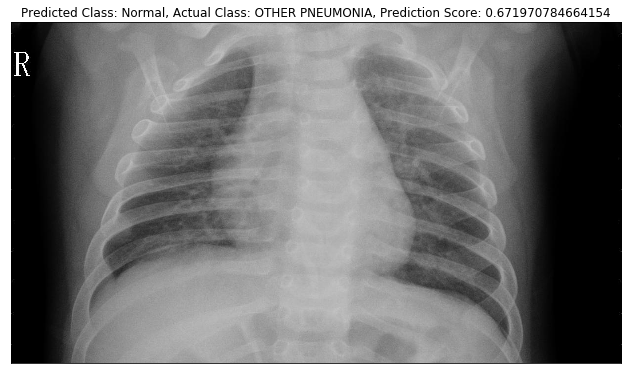

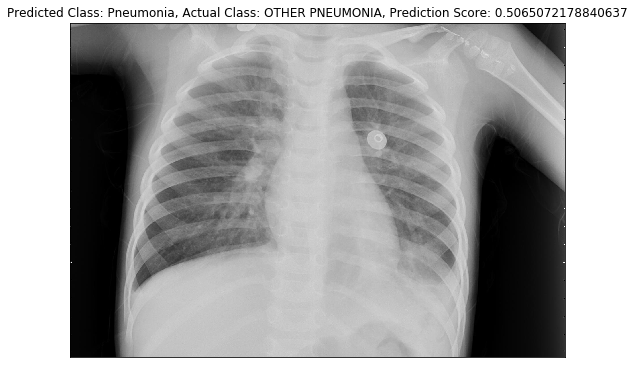

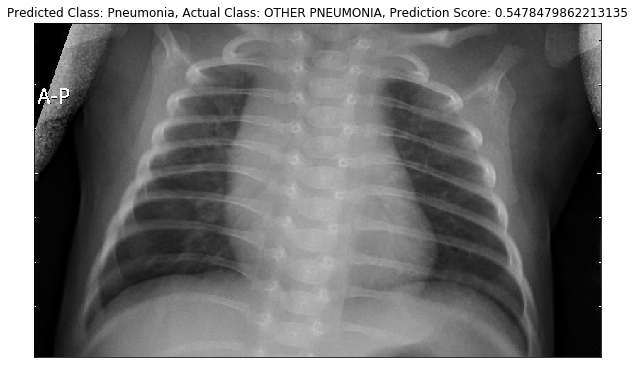

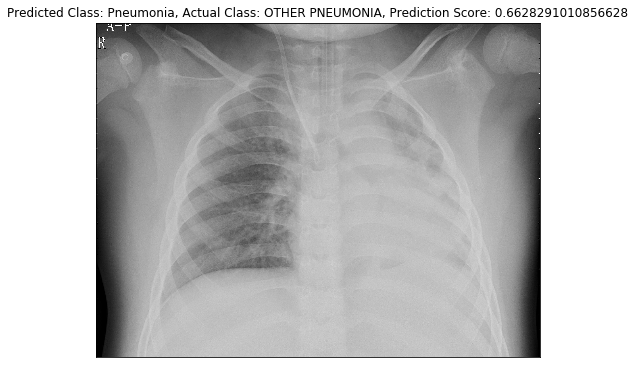

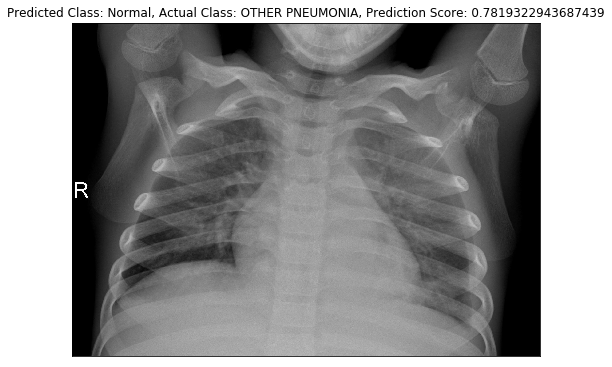

In [605]:
j = 0

test_dir = 'train-test-val_datasets/test'

for i in incorrect[:incorrect.shape[0]]:
    plt.figure(figsize=(15,25))
    image_path = test_dir + '/' + test_set.filenames[incorrect[j]] 
    # print(image_path)
    image = mpimg.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #pixels = np.array(image)
    #plt.imshow(pixels)
    
    plt.subplot(incorrect.shape[0],1,j+1)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.title("Predicted Class: {}, Actual Class: {}, Prediction Score: {}".format(prediction[i], trueClass[i],np.max(predictions[i])))
    
    #plt.xlabel(predictions[i])
    
    #dict(zip(model_MultinomalNB.classes_, model_MultinomalNB.predict_proba(sample_txt_transformed)[0]))
    
    plt.tight_layout()
    j += 1

In [606]:
predictedClass

array(['COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA',
       'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA',
       'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA',
       'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA',
       'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA',
       'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA',
       'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA', 'COVID-19 PNEUMONIA',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'OTHER PNEUMONIA', 'OTHER PNEUMONIA',
       'NORMAL', 'NORMAL', 'OTHER PNEUMONIA', 'OTHER PNEUMONIA',
       'OTHER PNEUMONIA', 'NORMAL', 'OTHER PNEUMONIA', 'OTHER PNEUMONIA',
       'OTHER PNEUMONIA', 'OTHER PNEUMONIA', 'COVID-19 PNEUMONIA',
       

In [607]:
type(predictedClass)

numpy.ndarray

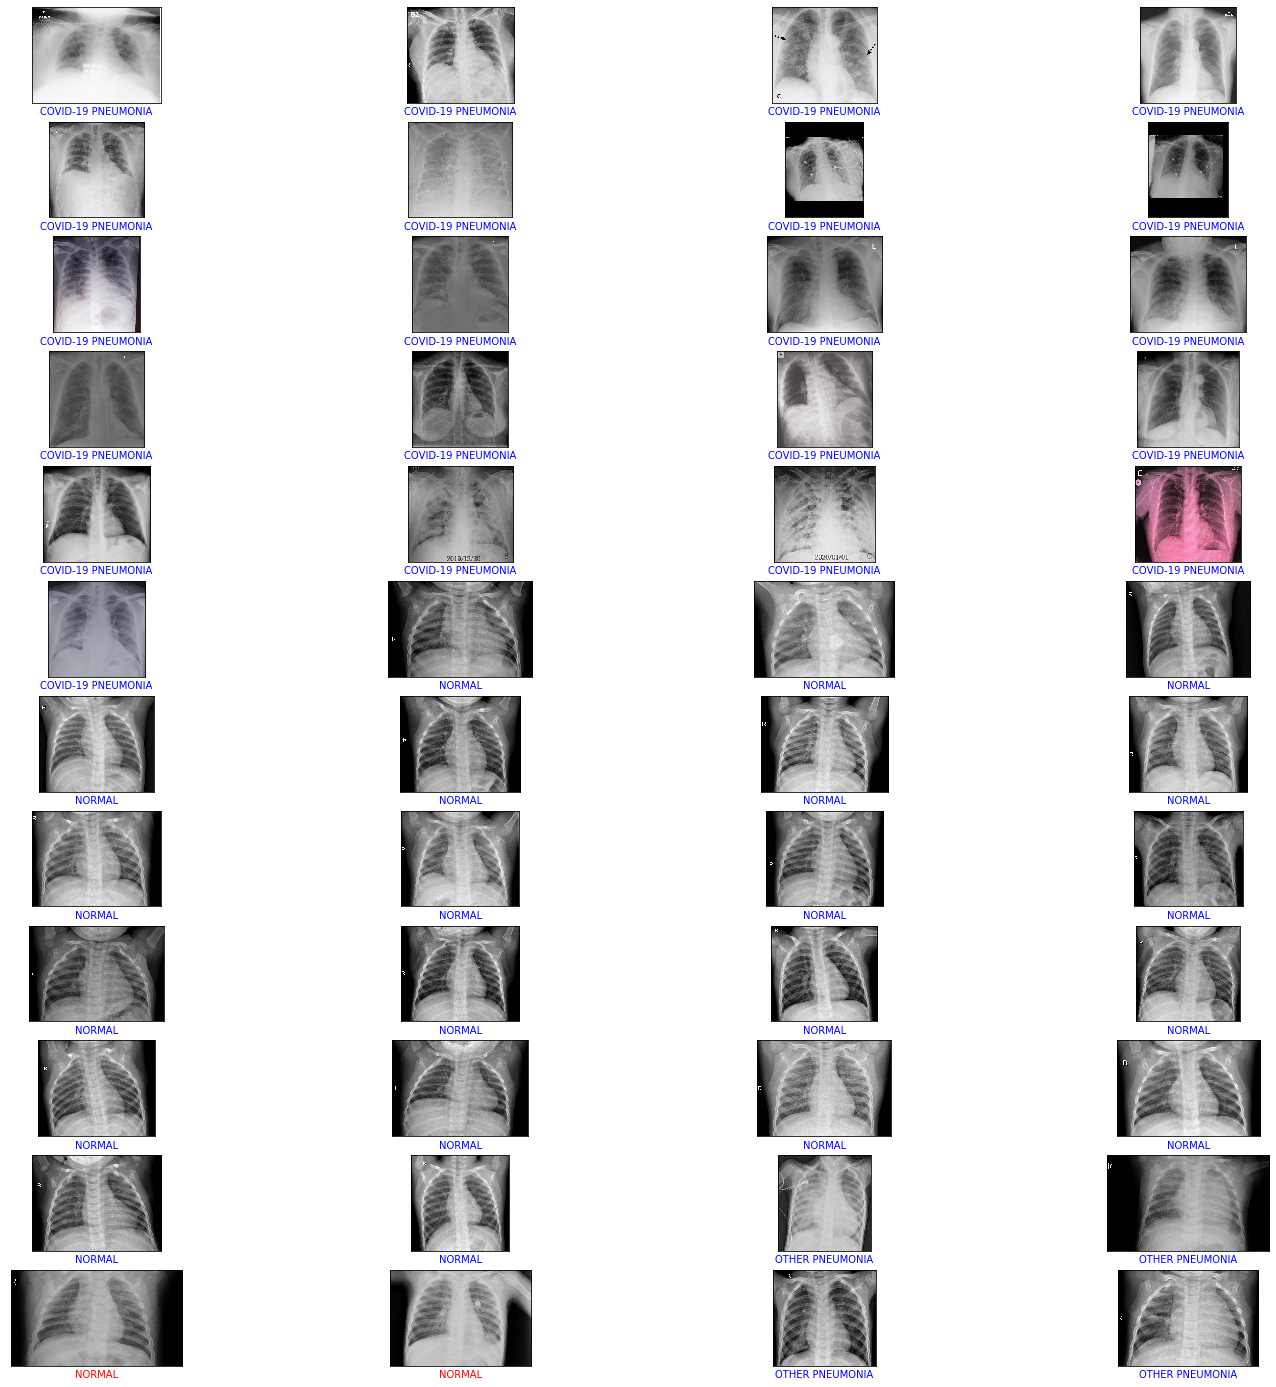

In [608]:
plt.figure(figsize=(25,25))
for i in range(48):
    plt.subplot(12,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_path = test_dir + '/' + test_set.filenames[i]
    image = mpimg.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    
    if(predictedClass[i]==trueClass[i]):
        plt.xlabel(predictedClass[i], color='blue')
    else:
        plt.xlabel(predictedClass[i], color='red')
plt.show()